# Finding Heavy Traffic Indicators on I-94 

The goal of this project is to look for heavy traffic indicators on highways: particularly, the Minneapolis-StPaul hourly traffic for westbound I-94.  This dataset was downloaded from the UCI machine learning repository, containing 2012-2018 data.
Leveraging data from the CIA World Factbook is an essential tool for gaining a broader understanding of global markets, political risks, and demographic trends. However, when it comes to pinpointing specific heavy traffic indicators on highways like the I-94, we need to turn to real-time traffic monitoring systems, GPS services, and local news sources for the most current information. By integrating these global intelligence insights from the Factbook with localized traffic data sources, we can make data-driven decisions that account for both international market dynamics and local transportation considerations.

In [4]:
import pandas as pd

metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
metro.tail(5)
metro.head(5)
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
metro



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


## Data Dictionary  
| Column | Description |
| --- | :-: |
| holiday | Categorical US National holidays plus regional holiday, Minnesota State Fair |
| temp | Numeric Average temp in kelvin |
| rain_1h | Numeric Amount in mm of rain that occurred in the hour |
| snow_1h | Numeric Amount in mm of snow that occurred in the hour |
| clouds_all | Numeric Percentage of cloud cover |
| weather_main | Categorical Short textual description of the current weather |
| weather_description | Categorical Longer textual description of the current weather |
| date_time | DateTime Hour of the data collected in local CST time |
| traffic_volume | Numeric Hourly I-94 ATR 301 reported westbound traffic volume |



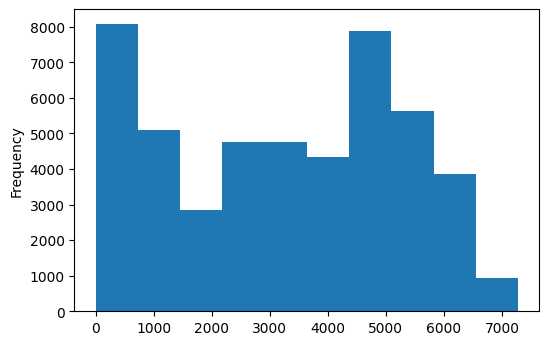

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
import matplotlib.pyplot as plt 

#allows jupyter to create graphs  
%matplotlib inline 

#plot a histogram to examine the distribution of the traffic_volume column
metro["traffic_volume"].plot.hist()
plt.show()

#get some statistics about the column
(metro["traffic_volume"]).describe()

[comments] 

There are two peaks (presumably rush hours). No visible pattern. It's hard to tell what this actually means because we don't understand the time. 

On the `metro.info()`though, about 25% of the time there are 1193 cars passing the station each hour. About 75% of the time, there are 4933 cars. 


### Traffic patterns at night and day
We'll classify "Day time" as the hours between 7am and 7pm, and "Night time" as the hours between 7pm and 7am. Dataquest wants us to think this initial visualization is helpful. The x-axis doesn't even tell us much information. 

In [7]:
metro["date_time"] = pd.to_datetime(metro["date_time"])

day = metro.copy()[(metro["date_time"].dt.hour >= 7) & (metro["date_time"].dt.hour < 19)]
night = metro.copy()[(metro["date_time"].dt.hour >= 19) | (metro["date_time"].dt.hour < 7)]

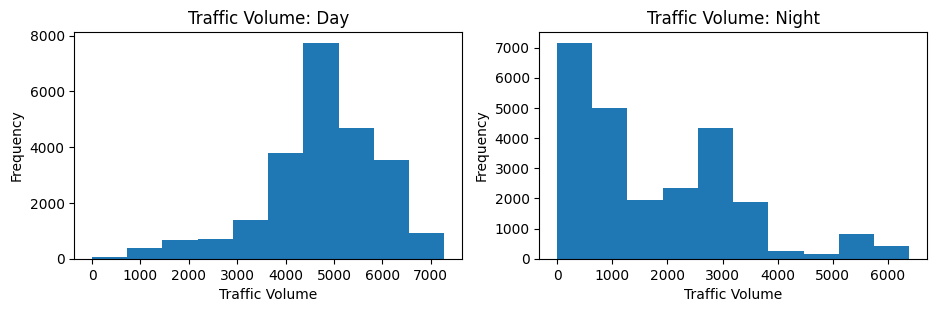

In [8]:
plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

The Day traffic volume skews to the left (though it almost symmetric), while the night traffic volume skews to the right. 
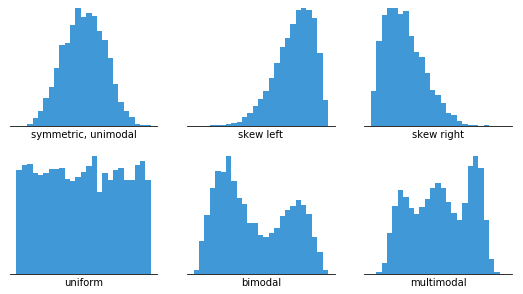
 
Simply put, this indicates that there are more occurences of high traffic volume at day than there are at night. On average, there are around 5,000 vehicles in an hour at the I-94 almost 8,000 times in the dataset, compared to ~ 1,000 cars almost 7000 times. The goal of this project is to identify causes of heavy traffic, and Dataquest argues that since traffic at night is light, we can disregard it moving forward. I agree.

## Time indicators 
There might be more people in certain times of the day, week, or month. I will construct line graphs as they are good at showing changes between shorter or longer time points. I will be using a new function: `DataFrame.groupby()` which groups columns by mapping, function, label, or list of labels. Combined with the `DataFrame.mean()` function, the output is a series of months and the mean traffic volume respectively.



In [6]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()

print(by_month)

             temp   rain_1h   snow_1h  clouds_all  traffic_volume
month                                                            
1      265.483409  0.015080  0.000631   58.554108     4495.613727
2      266.663789  0.004019  0.000000   51.550459     4711.198394
3      273.619940  0.015839  0.000000   56.827811     4889.409560
4      279.661071  0.105343  0.000000   59.221525     4906.894305
5      289.282668  0.130863  0.000000   56.548825     4911.121609
6      294.576068  0.271121  0.000000   48.612374     4898.019566
7      296.785052  4.412258  0.000000   42.176619     4595.035744
8      295.119191  0.228113  0.000000   42.556892     4928.302035
9      292.520287  0.289807  0.000000   45.184112     4870.783145
10     284.081011  0.016065  0.000000   53.497990     4921.234922
11     276.698007  0.006200  0.000000   56.697187     4704.094319
12     267.727846  0.035365  0.002213   66.942237     4374.834566


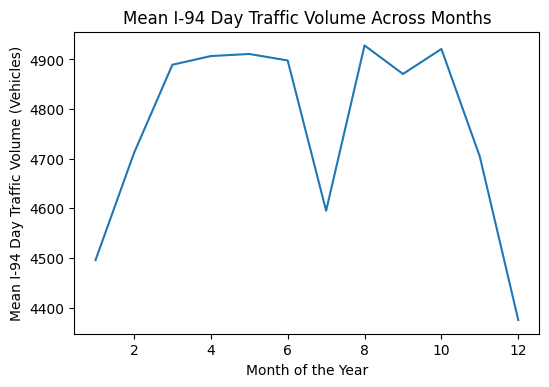

In [7]:
plt.plot(by_month['traffic_volume'])
plt.title('Mean I-94 Day Traffic Volume Across Months')
plt.xlabel('Month of the Year')
plt.ylabel('Mean I-94 Day Traffic Volume (Vehicles)')
plt.show()

Our line graph follows an almost symmetrical distribution. Traffic volume increases from January to March, plateaus until June. July takes a dip, increases in August and levels up until October, and decreases once again in December. 

In [25]:
# debugging
by_dayofweek.copy()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
dayofweek,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286
1,282.301770,0.129172,0.000194,52.333234,5189.004782
2,282.198316,0.068099,0.001091,53.662119,5284.454282
3,282.279115,0.172436,0.000148,53.993191,5311.303730
4,282.181216,0.092828,0.000225,51.412200,5291.600829
5,282.300646,0.107596,0.000094,50.446376,3927.249558
6,282.280340,0.133170,0.000000,52.288699,3436.541789


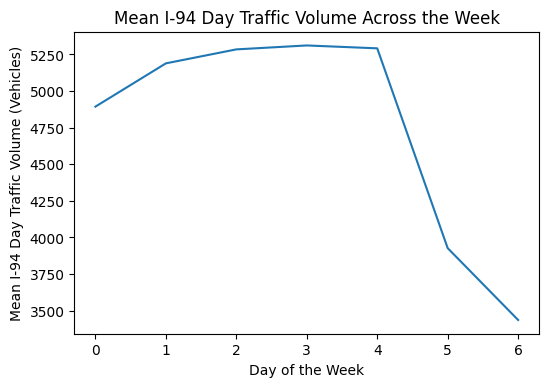

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()


plt.plot(by_dayofweek['traffic_volume'])
plt.title('Mean I-94 Day Traffic Volume Across the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean I-94 Day Traffic Volume (Vehicles)')
plt.show()

Days 0-4, or Monday-Friday have the most mean traffic volume, which then decrease on days 5 and 6 (weekends). This is likely due to rush hours from people going to work. Let's take a closer look by splitting the datasets into these two categories.

**How does traffic volume change by time of day in the weekend and in business days?**

In [39]:
#Split data set into two : weekend, business day by hour 
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday

#Make isolated dataframe 
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


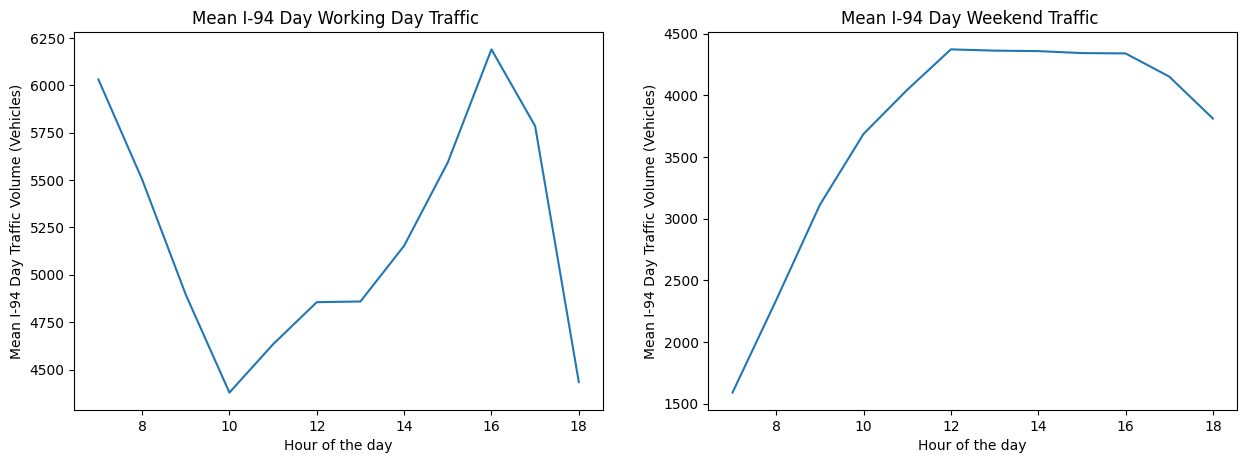

In [38]:
plt.figure(figsize=(15,5))

#first plot , business days 
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line() # plot by y-axis 
plt.title('Mean I-94 Day Working Day Traffic ')
plt.xlabel('Hour of the day')
plt.ylabel('Mean I-94 Day Traffic Volume (Vehicles)')

#second plot 
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line() # plot by y-axis 
plt.title('Mean I-94 Day Weekend Traffic ')
plt.xlabel('Hour of the day')
plt.ylabel('Mean I-94 Day Traffic Volume (Vehicles)')

plt.show()

Traffic volume is highest at around 7-8:00AM and ~4-4:30PM on business days. This is due to the rush hours where workers drive to work before their (typically) 8 or 9AM shifts. 

On weekends, traffic is generally high and plateaus from 11:00AM-4:00PM then start to decrease. This high volume is still lower compared to the peak traffic volume on week days (~4300 vehicles as opposed to ~6200 vehicles). 

### Time Indicators Summary

To summarize, we found that : 
* Traffic volume is highest in the months of March to June, and August to October. 
* Weekdays produce the highest traffic volumes, compared to weekends.
* Peak traffic volume on weekends are ~8:00-8:30AM and ~4:00-4:30PM (i.e. rush hours) on business days while ~11:30AM - 4:00PM on weekends.

## Weather Indicators
Thus far, we have explored time as the indicator for heavy traffic. In this section we will look at weather attributes such as `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description` and their relation to `traffic volume`. 

In [41]:
day

# numerical weather columns are: temp, rain_1h, snow_1h, clouds_all

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,hour
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13
...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,17


In [48]:
#Relation between traffic_volume and numerical weather columns 
# temp, rain_1h, snow_1h, clouds_all

day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Out of these weather elements, temperature shows the highest positive correlation with 0.13 while cloud coverage is a slight negative correlation at merely -0.03.

We will use a scatterplot to take a closer look at this correlation.

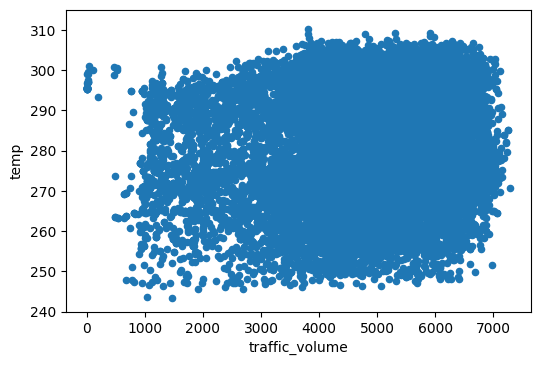

In [57]:
# traffic_volume and temp scatterplot 
day.plot.scatter('traffic_volume', 'temp') 
plt.ylim(240, 315)
plt.show()

This still does not seem to be a good indicator for traffic volume. 

Since the numerical data did not seem to have any correlation, we will examine the categorical data further by aggregating their means, and using a bar plot. 

In [68]:
#Aggregate data 
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

In [61]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,dayofweek,hour
weather_main,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,2.750344,12.153370


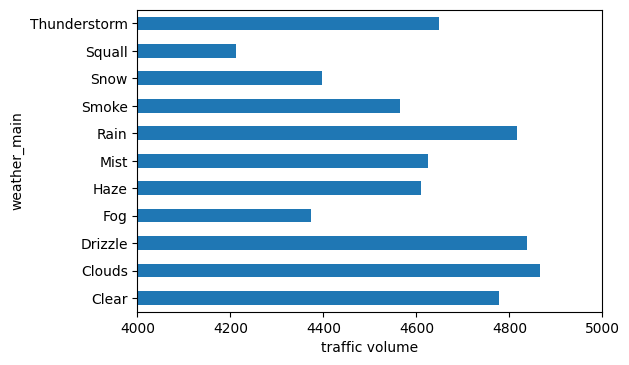

In [87]:
#Categorical data : weather_main
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('traffic volume')
plt.xlim(4000,5000)
plt.show()

There is no traffic volume exceeding 5,000 cars. There is less traffic volume in squall and foggy weather. For this analysis, cloudy weather, drizzle, and rain had the  most volume.

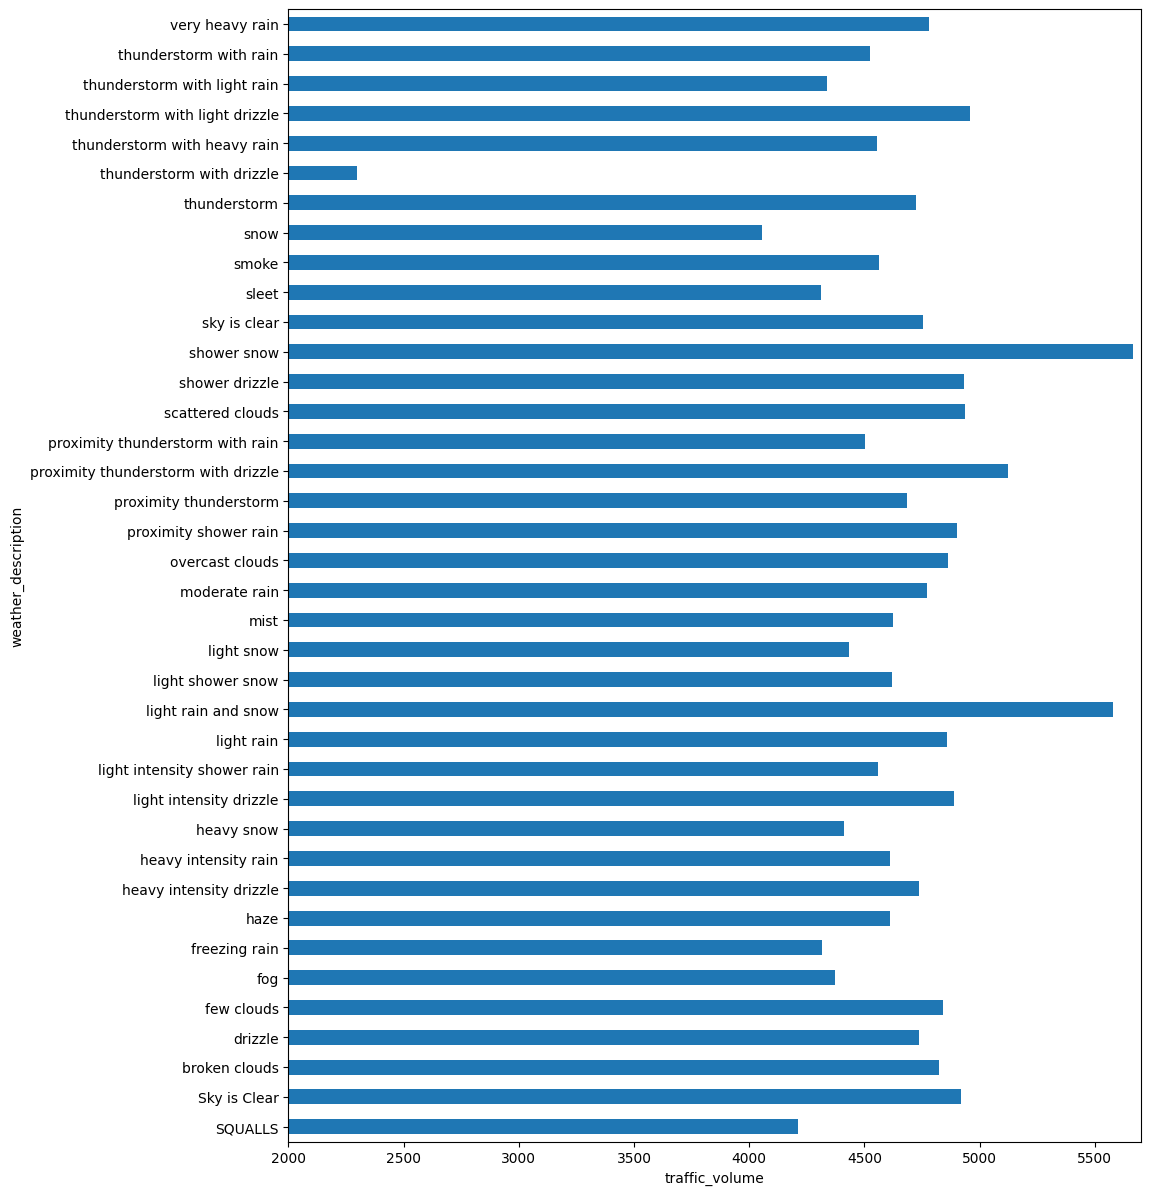

In [95]:
#Categorical data: weather_description
plt.figure(figsize=(11,15))
by_weather_description['traffic_volume'].plot.barh()
plt.xlabel('traffic_volume')
plt.xlim(2000,5700)
plt.show()

In this analysis, `shower snow` and `light rain and snow`  produced the most traffic volume and are good traffic indicators. This is likely because light snow can melt and refreeze quickly, forming ice sheets which would make drivers drive more cautiously and slowly.

## Conclusion
In conclusion, we observed the following from our analyses: 
* There is larger traffic volume at daytime compared to night time. 
* Traffic volume on business days is larger than on weekends. 
* Snow, shower snow, and light rain produce the most traffic volume. 
* There is less traffic volume in squall and foggy weather. 
* Traffic volume is highest at around 7-8:00AM and ~4-4:30PM on business days. 
